<a href="https://colab.research.google.com/github/MuhammadAwon/backyard-projects/blob/main/intro-to-deep-learning/neural_network_classification/02_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Exercises 🛠

1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes. 

Especially try different values of the learning, what happens when you decrease it?

With lower learning rate the model takes more epochs to learn the patterns in the data.

What happens when you increase it?

The model learns the patterns faster in less epochs when the learning rate is high.

---


2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
*Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.*

Let's make a dataset for binary classification problem using scikit-learn's `make_circles()` function.

In [ ]:
from sklearn.datasets import make_circles
# Make 2000 examples
n_samples = 2000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
# Check out features
X

array([[ 0.47109875, -0.58158579],
       [-0.61696058,  0.80818956],
       [-0.3999557 ,  0.70796779],
       ...,
       [ 0.62826832, -0.73910589],
       [-0.78365851,  0.16358464],
       [ 0.58442953,  0.56308224]])

In [ ]:
# See the first 10 labels
y[:10]

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
# Make dataframe of freatures and labels
circles = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'label': y})
circles.head()

,X0,X1,label
0,0.471099,-0.581586,1
1,-0.616961,0.808190,0
2,-0.399956,0.707968,1
3,0.829385,-0.600573,0
4,-0.164191,0.761289,1


In [ ]:
# Check out the differn labels and their count
circles.label.value_counts()

1    1000
0    1000
Name: label, dtype: int64

Look like we're dealing with binary classification proble.

Let's plot the data for visualization.

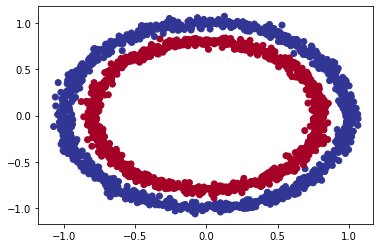

In [ ]:
# Visualize with a plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu_r)

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((2000, 2), (2000,))

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([ 0.47109875, -0.58158579]), 1)

So we have two `X` features which lead to one `y` value.

This means our neural network input shape will has to accept one dimension tensor being value of two and output a tensor with at least one value.

Let's build the model as mentioned in the `question-2`:
* 5 hidden layers and 6 neurons in each layer
* Adam optimizer, binary crossentropy loss and accuracy metric.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (according to the specification of question 2)
model = tf.keras.Sequential([
                tf.keras.layers.Dense(6, input_shape=(2,)),
                tf.keras.layers.Dense(6),
                tf.keras.layers.Dense(6),
                tf.keras.layers.Dense(6),
                tf.keras.layers.Dense(6),
                tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# Check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
__________________________________________________________

---
3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

In [ ]:
# Check out the features
X

array([[-0.17186341,  0.59624885],
       [ 1.25328273, -0.26541353],
       [ 0.72322405,  0.2319425 ],
       ...,
       [ 1.77095705, -0.50943619],
       [-1.06177158,  0.006786  ],
       [ 0.76117231,  0.65196041]])

In [ ]:
# View first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# Create dataframe for features and their labels
moons = pd.DataFrame({'first_feature': X[:, 0], 'second_feature': X[:, 1], 'label': y})
moons.head()

,first_feature,second_feature,label
0,-0.171863,0.596249,1
1,1.253283,-0.265414,1
2,0.723224,0.231943,1
3,-0.065198,-0.655194,1
4,-0.799493,0.552935,0


In [ ]:
# Count different classes
moons.label.value_counts()

1    500
0    500
Name: label, dtype: int64

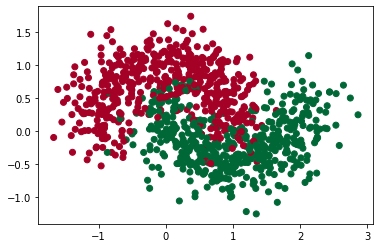

In [ ]:
# Plot the data for visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn);

In [ ]:
# Find the shape of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
                  tf.keras.layers.Dense(4, input_shape=(X.shape[-1],), activation='relu'),
                  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Check the summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
history_1 = model_1.fit(X, y, epochs=30)

Epoch 1/30
32/32 [==============================] - 1s 1ms/step - loss: 0.6494 - accuracy: 0.6490
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.7640
Epoch 3/30
32/32 [==============================] - 0s 1ms/step - loss: 0.5889 - accuracy: 0.8310
Epoch 4/30
32/32 [==============================] - 0s 1ms/step - loss: 0.5615 - accuracy: 0.8420
Epoch 5/30
32/32 [==============================] - 0s 1ms/step - loss: 0.5357 - accuracy: 0.8420
Epoch 6/30
32/32 [==============================] - 0s 1ms/step - loss: 0.5119 - accuracy: 0.8450
Epoch 7/30
32/32 [==============================] - 0s 1ms/step - loss: 0.4901 - accuracy: 0.8410
Epoch 8/30
32/32 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.8410
Epoch 9/30
32/32 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.8420
Epoch 10/30
32/32 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.8430
Epoch 11/30
32/32 [

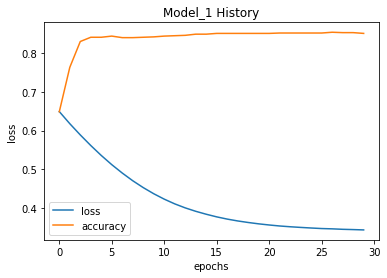

In [ ]:
# Plot the history
pd.DataFrame(history_1.history).plot(title='Model_1 History')
plt.xlabel('epochs')
plt.ylabel('loss');

Let's create a function to plot decision boundary to visualize the models performance.

In [ ]:
# Create function to plot decision boundary
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification...')
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification...')
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlGn, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlGn)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification...


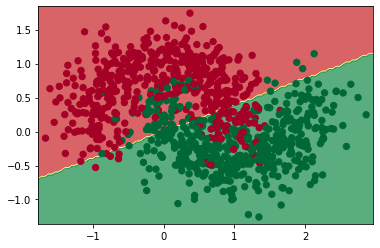

In [ ]:
# Check the predictions our model is making
plot_decision_boundary(model_1, X, y)

Let's try to improve model to get over 85% accuracy.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
              tf.keras.layers.Dense(4, activation='relu'),  # notice the input shape is not provide, keras will auto find it during training
              tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # higer learning rate by 10x
                metrics=['accuracy'])

# Fit the model
histroy_2 = model_2.fit(X, y, epochs=30)

Epoch 1/30
32/32 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.8130
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8490
Epoch 3/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8490
Epoch 4/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3405 - accuracy: 0.8520
Epoch 5/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3405 - accuracy: 0.8500
Epoch 6/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8500
Epoch 7/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8520
Epoch 8/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8540
Epoch 9/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3399 - accuracy: 0.8470
Epoch 10/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.8520
Epoch 11/30
32/32 [

In [ ]:
# Evaluate the model (same data on which the model got trained)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8540


[0.33067941665649414, 0.8539999723434448]

doing binary classification...


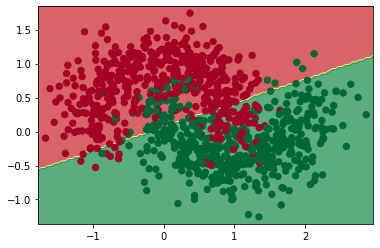

In [ ]:
# Visualize the predictions of model_2
plot_decision_boundary(model_2, X, y)

Let's increase the number of hidden layers (2 with 4 neurons each) and everything else can stay the same as model_2

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
                  tf.keras.layers.Dense(4, activation='relu'),
                  tf.keras.layers.Dense(4, activation='relu'),
                  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(X, y, epochs=30)

Epoch 1/30
32/32 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.7370
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8480
Epoch 3/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3402 - accuracy: 0.8560
Epoch 4/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8610
Epoch 5/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8590
Epoch 6/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3182 - accuracy: 0.8680
Epoch 7/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3138 - accuracy: 0.8640
Epoch 8/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3075 - accuracy: 0.8680
Epoch 9/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.8690
Epoch 10/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8720
Epoch 11/30
32/32 [

doing binary classification...


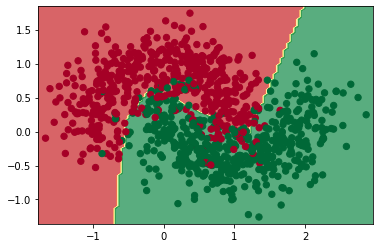

In [ ]:
# Visualize model_3 predictions
plot_decision_boundary(model_3, X, y)

NICE!!

---
4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

In [ ]:
# Import and load the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Classes names according to respective label number from 0 to 9
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Check the shape of the data (each image represents 28x28 pixels)
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

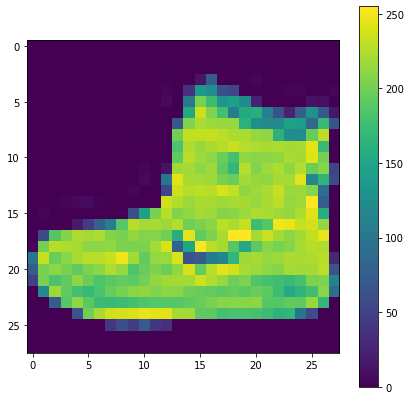

In [ ]:
# Inspect the image (notice the pixel values fall in the range of 0 to 225)
plt.figure(figsize=(7, 7))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(b=False)
plt.show()

In [ ]:
# Normalized the images (scaling between 0 to 1)
train_images_norm = train_images / 255.0
test_images_norm = test_images / 225.0

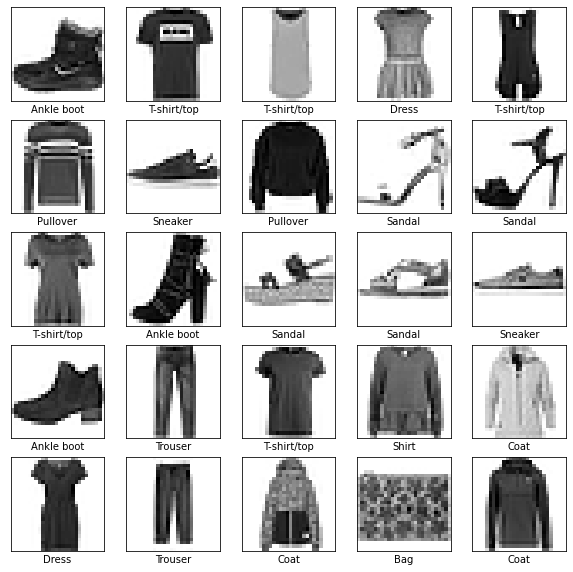

In [ ]:
# Display first 25 images to varify that the data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(4, activation='relu'),
                tf.keras.layers.Dense(4, activation='relu'),
                tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Check summary
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_15 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model for training
histroy_4 = model_4.fit(train_images_norm, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.7914
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5641 - accuracy: 0.8006
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5544 - accuracy: 0.8043
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5488 - accuracy: 0.8063
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5428 - accuracy: 0.8077
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5373 - accuracy: 0.8097
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.536

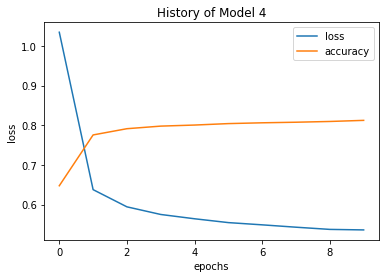

In [ ]:
# Plot the history graph
pd.DataFrame(histroy_4.history).plot(title='History of Model 4')
plt.xlabel('epochs')
plt.ylabel('loss');

In [ ]:
# Evaluate accuracy on test set
loss, acc = model_4.evaluate(test_images_norm, test_labels)
print(f'Test loss: {loss*100:.2f}%')
print(f'Test accuracy: {acc*100:.2f}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.8024
Test loss: 57.55%
Test accuracy: 80.24%


In [ ]:
# Make predictions
y_probs = model_4.predict(test_images_norm)

# View the first prediction
y_probs[0]

array([1.3364157e-11, 1.2632931e-16, 1.2684902e-05, 3.4023919e-09,
       4.6269841e-05, 1.3428129e-01, 4.5923706e-08, 6.3101865e-02,
       3.5835740e-03, 7.9897428e-01], dtype=float32)

In [ ]:
# Find the label number of first prediction
np.argmax(y_probs[0])

9

In [ ]:
# Find the class name of the first prediction
class_names[np.argmax(y_probs[0])]

'Ankle boot'

In [ ]:
# Create the function to plot image
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Create function to plot predicted value
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

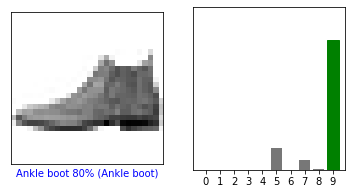

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_probs[i], test_labels, test_images_norm)
plt.subplot(1,2,2)
plot_value_array(i, y_probs[i], test_labels)
plt.show()

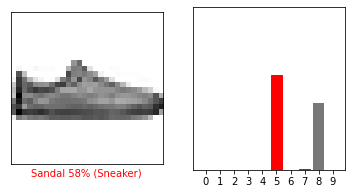

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_probs[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, y_probs[i],  test_labels)
plt.show()

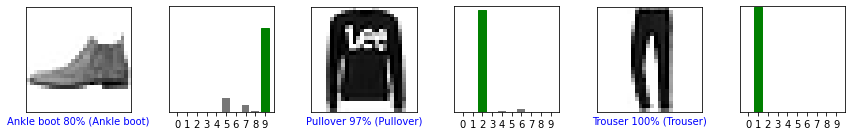

In [ ]:
# Plot the first n test images, their predicted labels, and the true labelss
# Color correct predictions in green and incorrect predictions in red
num_rows = 1
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_probs[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_probs[i], test_labels)
plt.tight_layout()
plt.show()

---
5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [ ]:
# Create function of softmax
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

In [ ]:
# Create a tensor
tensor = tf.range(-20, 20, dtype=tf.float32)
tensor

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.], dtype=float32)>

In [ ]:
# Use of the softmax function on our tensor
softmax(tensor)

array([7.2998697e-18, 1.9843103e-17, 5.3939151e-17, 1.4662180e-16,
       3.9855936e-16, 1.0833968e-15, 2.9449775e-15, 8.0052796e-15,
       2.1760605e-14, 5.9151462e-14, 1.6079031e-13, 4.3707342e-13,
       1.1880888e-12, 3.2295601e-12, 8.7788544e-12, 2.3863399e-11,
       6.4867452e-11, 1.7632801e-10, 4.7930920e-10, 1.3028975e-09,
       3.5416428e-09, 9.6271835e-09, 2.6169396e-08, 7.1135794e-08,
       1.9336714e-07, 5.2562638e-07, 1.4288006e-06, 3.8838830e-06,
       1.0557488e-05, 2.8698229e-05, 7.8009878e-05, 2.1205282e-04,
       5.7641929e-04, 1.5668701e-03, 4.2591952e-03, 1.1577690e-02,
       3.1471431e-02, 8.5548207e-02, 2.3254417e-01, 6.3212055e-01],
      dtype=float32)

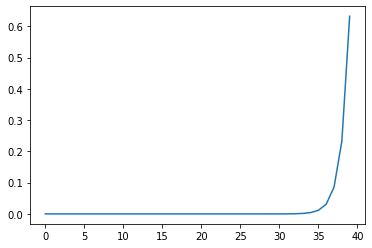

In [ ]:
# Plot softmax modified tensor
plt.plot(softmax(tensor));

---

6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

The model will be same as model_4, however along with accuracy and confusion matrix, there's going to be some additional changes as well:
* We'll be using learning rate callback to find the best learning rate for our model.
* Make a function to display 5 random images and their predictions.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_4)
model_5 = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape=(28,28)),
              tf.keras.layers.Dense(4, activation='relu'),
              tf.keras.layers.Dense(4, activation='relu'),
              tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Create learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# Fit the model (use test set for validation, and callback)
history_5 = model_5.fit(train_images_norm, train_labels,
                        epochs=30,
                        validation_data=(test_images_norm, test_labels),
                        callbacks=(lr_scheduler))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9126 - accuracy: 0.3121 - val_loss: 1.5961 - val_accuracy: 0.4069
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3422 - accuracy: 0.5300 - val_loss: 1.1052 - val_accuracy: 0.6419
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9738 - accuracy: 0.6798 - val_loss: 0.8894 - val_accuracy: 0.6907
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8289 - accuracy: 0.7134 - val_loss: 0.8076 - val_accuracy: 0.7114
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7603 - accuracy: 0.7366 - val_loss: 0.7573 - val_accuracy: 0.7342
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7181 - accuracy: 0.7506 - val_loss: 0.7280 - val_accuracy: 0.7418
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6897 - accuracy: 0.7584 - val_loss: 0.7037 - val_accuracy:

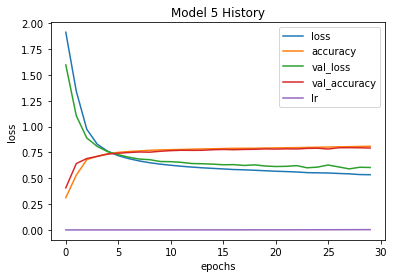

In [ ]:
# Plot the history
pd.DataFrame(history_5.history).plot(title='Model 5 History')
plt.xlabel('epochs')
plt.ylabel('loss');

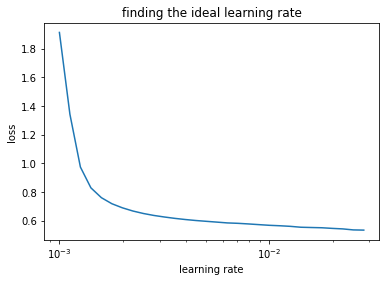

In [ ]:
# Plot the learning rate decay curve
lrs = 1e-3*(10**(tf.range(30)/20))
plt.semilogx(lrs, history_5.history['loss'])  # we want the x-axis to be log-scale
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('finding the ideal learning rate');

By looking at the graph seems like our ideal learning rate is 10-3 (0.001), which is Adam default learning rate.

Let's make a function to display 5 random images and their predictions respectively.

In [ ]:
# Make probabilities predictions
y_probs_5 = model_5.predict(test_images_norm)

In [ ]:
# Convert the probability prediction in class numbers
y_probs_5[8].argmax()

5

In [ ]:
# Find the class name of the probability prediction
class_names[y_probs_5[8].argmax()]

'Sandal'

In [ ]:
import random

# Make function to display random images
def get_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))

  # Create targets
  target_image = images[i]
  true_label = classes[true_labels[i]]

  # Create predictions
  pred_probs = model.predict(target_image.reshape(1, 28, 28))  # have to reshape the image to get into  right size for model
  pred_label = classes[pred_probs.argmax()]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)
  plt.xticks([])  # to avoid ticks
  plt.yticks([])

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (prediction/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*np.max(pred_probs),
                                                   true_label),
                                                    color=color)  # Set the color to green or red

In [ ]:
def visualize_random_images(model, images, true_labels, classes):
  # Check out a random image as well as its prediction
  num_rows = 1
  num_cols = 5
  num_images = num_rows*num_cols
  plt.figure(figsize=(20, 7))  # figsize = width, height
  for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    get_random_image(model, images, true_labels, classes)
  plt.show()

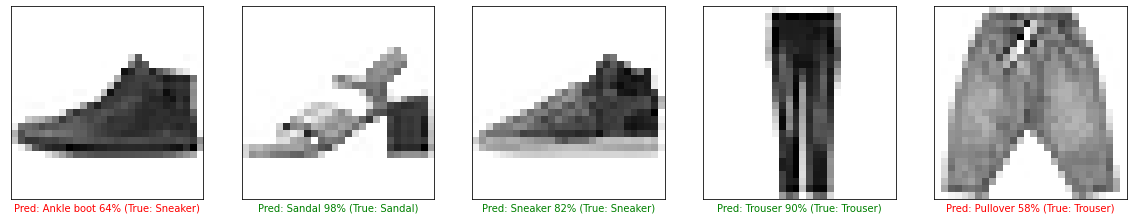

In [ ]:
visualize_random_images(model_5, test_images_norm, test_labels, class_names)

Perfect! Lets try to improve the model and get over 88% accuracy, and plot the confusion matrix as well.

Everything stays same as model_5, but train for longer and use default learning rate.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.Dense(4, activation='relu'),
          tf.keras.layers.Dense(4, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model (train on 40 epochs)
history_6 = model_6.fit(train_images_norm, train_labels,
                        validation_data=(test_images_norm, test_labels),
                        epochs=40)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6929 - val_accuracy: 0.7604
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6425 - val_accuracy: 0.7828
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6241 - val_accuracy: 0.7846
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6211 - val_accuracy: 0.7865
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6387 - val_accuracy: 0.7858
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5901 - val_accuracy: 0.7955
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [ ]:
# Make function to plot model history
def plot_history(model_history, title: str):
  pd.DataFrame(model_history.history).plot(title=title)
  plt.xlabel('epochs')
  plt.ylabel('loss');

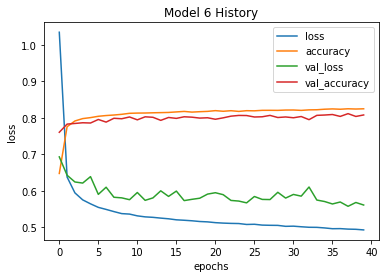

In [ ]:
plot_history(model_history=history_6, title='Model 6 History')

In [ ]:
# Make function to convert prediction probabilities to labels
def make_predictions(model):
  # Get predictions probabilities
  pred_probs = model.predict(test_images_norm)

  # Convert all the probabilities to labels
  return pred_probs.argmax(axis=1)

In [ ]:
y_pred_6 = make_predictions(model_6)

# View first 10 predictions
y_pred_6[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# Check out confusion matrix by importing sklearn confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_pred_6)

array([[826,  10,   9,  56,   5,   2,  79,   0,  13,   0],
       [  5, 948,   2,  29,   6,   0,  10,   0,   0,   0],
       [ 39,   1, 570,   8, 187,   0, 179,   0,  15,   1],
       [ 65,  24,   8, 796,  44,   1,  50,   2,  10,   0],
       [  2,   1,  76,  25, 765,   0, 124,   0,   7,   0],
       [  0,   1,   0,   0,   0, 920,   0,  43,   7,  29],
       [207,   5, 113,  38, 115,   3, 501,   0,  18,   0],
       [  0,   0,   0,   0,   0,  48,   0, 904,   1,  47],
       [ 14,   0,  27,  18,   5,   8,   9,   5, 913,   1],
       [  0,   0,   0,   0,   1,  21,   0,  37,   5, 936]])

Make a function to visualize the confusion matrix. *The function needs different name than sklearn plot_confusion_matrix*.

In [ ]:
# Create function for confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15,15), text_size=10):
  """
  Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(15, 15)).
    text_size: Size of output figure text (default=10).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels,  # ground truth test labels
                          y_pred=y_preds,  # predicted labels
                          classes=class_names,  # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[: np.newaxis]  # normalize it
  n_classes = cm.shape[0]  # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)  # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title='Confusion Matrix',
         xlabel='Predicted Label',
         ylabel='True Label',
         xticks=np.arange(n_classes),  # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels,  # axes will be labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.0

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=text_size)

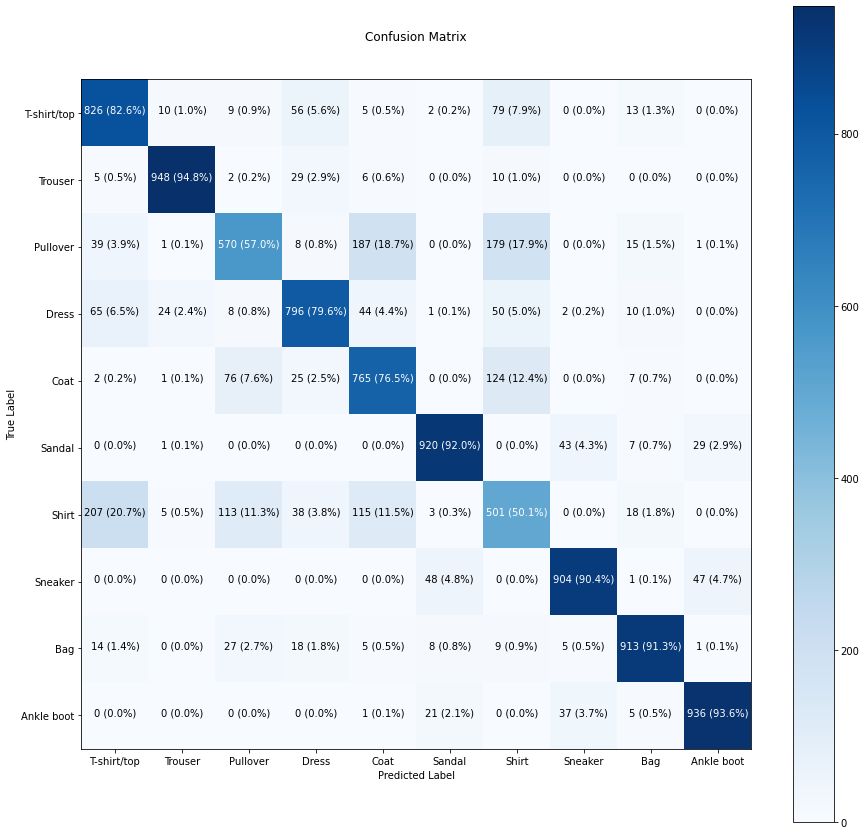

In [ ]:
make_confusion_matrix(y_true=test_labels, y_pred=y_pred_6,
                      classes=class_names)

Now everything has been functionalized and ready to use, time to imporve the accuracy.

Replicate model_6 with slight tweak:
* Increase the number of neurons in each hiddern layer (8)
* Reduce model training from 40 to 30 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (2 hidden layers with 8 nodes in each layer)
model_7 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.Dense(8, activation='relu'),
          tf.keras.layers.Dense(8, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_images_norm, train_labels,
                        epochs=30,
                        validation_data=(test_images_norm, test_labels))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7501 - accuracy: 0.7416 - val_loss: 0.5468 - val_accuracy: 0.8131
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5023 - accuracy: 0.8263 - val_loss: 0.6071 - val_accuracy: 0.8006
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4681 - accuracy: 0.8386 - val_loss: 0.5161 - val_accuracy: 0.8170
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4490 - accuracy: 0.8456 - val_loss: 0.4977 - val_accuracy: 0.8308
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4407 - accuracy: 0.8467 - val_loss: 0.5283 - val_accuracy: 0.8207
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4323 - accuracy: 0.8504 - val_loss: 0.4890 - val_accuracy: 0.8335
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4262 - accuracy: 0.8511 - val_loss: 0.4828 - val_accuracy:

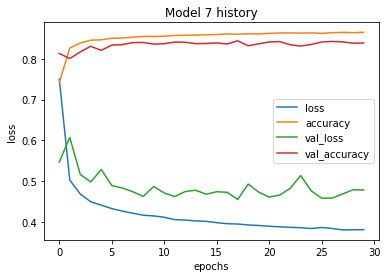

In [ ]:
# Plot history
plot_history(history_7, 'Model 7 history')

* Next attempt: 16 neurons in each layer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model 
model_8 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.Dense(16, activation='relu'),
          tf.keras.layers.Dense(16, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(train_images_norm, train_labels,
                        epochs=30,
                        validation_data=(test_images_norm, test_labels))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6000 - accuracy: 0.7942 - val_loss: 0.4736 - val_accuracy: 0.8313
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4348 - accuracy: 0.8478 - val_loss: 0.5157 - val_accuracy: 0.8284
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4054 - accuracy: 0.8576 - val_loss: 0.4464 - val_accuracy: 0.8411
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3871 - accuracy: 0.8642 - val_loss: 0.4421 - val_accuracy: 0.8466
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3764 - accuracy: 0.8682 - val_loss: 0.4510 - val_accuracy: 0.8467
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3658 - accuracy: 0.8691 - val_loss: 0.4386 - val_accuracy: 0.8440
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3589 - accuracy: 0.8710 - val_loss: 0.4212 - val_accuracy:

I had to skip forward after multiple experiments (around 12)...

Next model:
* First hidden layer with 256 nodes, second hidden layer with 128 nodes.
* Train for 30 epochs & batch size 128.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model 
model_9 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_9 = model_9.fit(train_images_norm, train_labels,
                        epochs=30, batch_size=128,
                        validation_data=(test_images_norm, test_labels))

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 0.5087 - accuracy: 0.8217 - val_loss: 0.4364 - val_accuracy: 0.8416
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3667 - accuracy: 0.8679 - val_loss: 0.3825 - val_accuracy: 0.8621
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3276 - accuracy: 0.8805 - val_loss: 0.3681 - val_accuracy: 0.8697
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3041 - accuracy: 0.8868 - val_loss: 0.3764 - val_accuracy: 0.8663
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2867 - accuracy: 0.8949 - val_loss: 0.3549 - val_accuracy: 0.8746
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2722 - accuracy: 0.8983 - val_loss: 0.3489 - val_accuracy: 0.8770
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2584 - accuracy: 0.9036 - val_loss: 0.3364 - val_accuracy: 0.8811
Epoch 

I see...

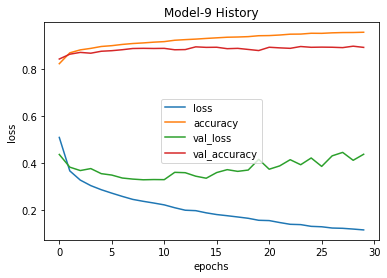

In [ ]:
# Plot the history
plot_history(history_9, "Model-9 History")

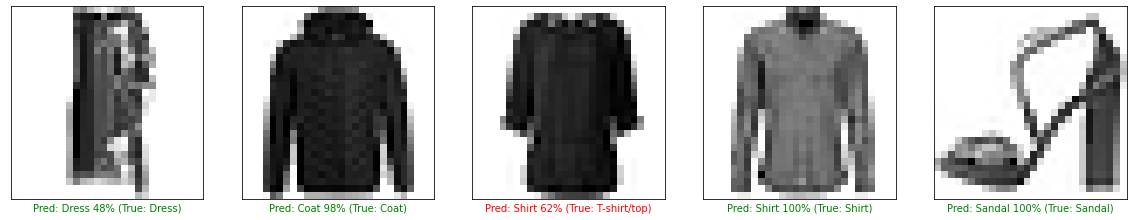

In [ ]:
# Visualize random images
visualize_random_images(model=model_9, images=test_images_norm, true_labels=test_labels, classes=class_names)

In [ ]:
# Make predictions of model_21
y_pred_9 = make_predictions(model=model_9)
y_pred_9[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

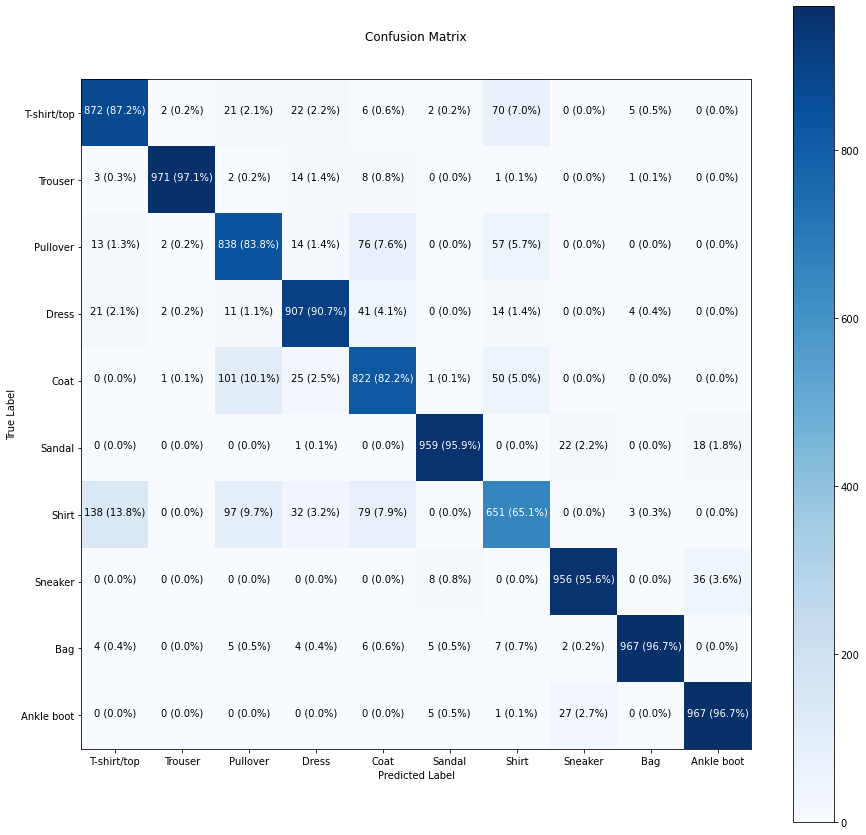

In [ ]:
# Visualize the confusion matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_pred_9, classes=class_names)

---
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.

In [ ]:
# Make function to plot image
def plot_image(indx, predictions, true_labels, target_images):
  """
  Picks an image, plots it and labels it with a predicted and truth label.

  Args:
  indx: index number to find the image and its true label.
  predictions: model predictions on test data (each array is a predicted probability of values between 0 to 1).
  true_labels: array of ground truth labels for images.
  target_images: images from the test data (in tensor form).

  Returns:
  A plot of an image from `target_images` with a predicted class label
  as well as the truth class label from `true_labels`.
  """
  # Set target image
  target_image = target_images[indx]
  # Truth label
  true_label = true_labels[indx]
  # Predicted label
  predicted_label = np.argmax(predictions)  # find the index of max value

  # Show image
  plt.imshow(target_image, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])

  # Set colors for right or wrong predictions
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Labels appear on the x-axis along with accuracy %
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions),
                                class_names[true_label]),
                                color=color)



# Function to display image of a certain class
def display_image(class_of_interest: str, nb_samples: int=3):
    # Set figure size
    plt.figure(figsize=(10,10))
    
    # Set the class index
    class_indx = class_names.index(class_of_interest)
    # Set the target image index when true labels are same as class index
    target_idx = np.where(test_labels==class_indx)[0]
    # Set the target image index for choosing 3 random images of the same class
    imgs_idx = np.random.choice(target_idx, nb_samples, replace=False)

    # Display 3 images
    for i in range(nb_samples):
       plt.subplot(1, nb_samples, i+1)

       # plot_image function
       plot_image(indx=imgs_idx[i], 
                  predictions=y_probs[imgs_idx[i]],
                  true_labels=test_labels, 
                  target_images=test_images_norm)

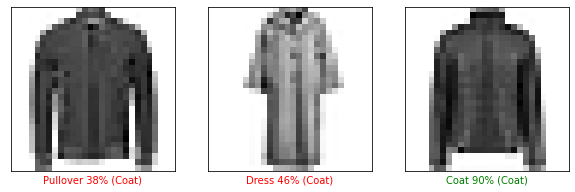

In [ ]:
# Call display_image function
display_image(class_of_interest='Coat')

## Extra curriculum 📖

Watch 3Blue1Brown's neural networks video 2: [*Gradient descent, how neural networks learn*](https://www.youtube.com/watch?v=IHZwWFHWa-w). After you're done, write 100 words about what you've learned.
  * If you haven't already, watch video 1: [*But what is a Neural Network?*](https://youtu.be/aircAruvnKk). Note the activation function they talk about at the end.

Neural networks tend to find the pattern in the data. Typical neural network architecture is consists of three types of layers, known as the input layer, hidden layer(s), and an output layer. Each layer has nodes that hold some numbers. The input layer is a vector of available features in the data, and the goal of the hidden layers is to lead these features of samples to their corresponding label in the output layer. Each node in the hidden layer has the weighted sum and a bias add to it. This equation in every node then gets computed with an activation function (normally relu) to range its output number between 0 to 1. The output layer determines its results based on the numbers it gets from these numbers.
Next, it is the cost function that calculates how accuracy is the prediction of the output layer. A cost function is the square of the difference between the true data points and the predicted points, and it gets tuned through the process called backpropagation until the loss reaches its global minima where no further improvement is possible. This is what neural networks do in a nutshell.

---

Watch [MIT's introduction to deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) (if you haven't already) to get an idea of the concepts behind using linear and non-linear functions.

**Completed.**

---

Spend 1-hour reading [Michael Nielsen's Neural Networks and Deep Learning book](http://neuralnetworksanddeeplearning.com/index.html).

This book is full of insightful informations, so I've decided to read the book completely in chunks.

---

Read the [ML-Glossary documentation on activation functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html). Which one is your favourite?

My favorite activation function is ReLU (Rectified Linear Units). The formula is quite simple: *max(0, z)*. It has fast and better ability to learn with less computation than Sigmoid and tanh because it involves simpler mathmematical operations. It avoids and rectifies vanishing gradient problem.

Like any other activation function, ReLU has some limitations as well. It can only be used in hidden layers, and also it ranges *[0,∞)*, means it can blow up the activation.

---

After you've read the ML-Glossary, see which activation functions are available in TensorFlow by searching "tensorflow activation functions".
* Linear - [tf.keras.activations.linear](https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear)
* ELU - [tf.keras.activations.elu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/elu)
* ReLU - [tf.keras.activations.relu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)
* LeakyReLU - Not Available.
* Sigmoid - [tf.keras.activations.sigmoid](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid)
* Softmax - [tf.keras.actiavtions.softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax)
* Tanh - [tf.keras.activations.tanh](https://www.tensorflow.org/api_docs/python/tf/keras/activations/tanh)

---